# Task 4.10 Coding Etiquette & Excel Reporting

# Instacart Basket Analysis 

#### Table of Contents 

1. Importing Data
2. PII data
3. Regional Data (For-Loop)
4. Identifying and excluding low-activity customers
5. Customer profiling
- 5.1 Age
- 5.2 Income
- 5.3 Family Status
- 5.4 Parental Status 
- 5.5 Certain Goods
- 5.6 Day Ordered
- 5.7 Comparison
6. Visualizations 
7. Aggregating variables 
8. Comparing customer data: regions|departments 
- 8.1 Loyality status 
- 8.2 Region and Ordering Habits
- 8.3 Parental status 
- 8.4 Age
- 8.5 Marital status
- 8.6 Income

### Question 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'/Users/ColinLynt/11-2021 Instacart Basket Analysis'

In [3]:
# Importing sb_merge
db_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'db_merge.pkl'))

In [162]:
# Importing df_price_range
df_price_range = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_revised.pkl'))

In [4]:
# Checking the names of db_merge
db_merge.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Last Name,Gender,State,Age,Date Joined,n_dependants,Marital Status,Income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Checking the shape of the data
db_merge.shape

(32436241, 28)

In [6]:
# Checking the data types of each column
db_merge.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_day_of_week            int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
max_order                    int64
loyalty_flag                object
spending                   float64
spending_flag               object
frequency                  float64
frequency_flag              object
Last Name                   object
Gender                      object
State                       object
Age                          int64
Date Joined                 object
n_dependants                 int64
Marital Status              object
Income                       int64
_merge                    category
dtype: object

### Question 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### ANSWER: All data pertaining to sensitive personal information would be considered PII. The Instacart data has data like Last Name, Gender, State, Number of Independents, Marital Status, and Income that make it PII. This data should have proper security protocols to ensure it isn't retrieved by anyone outside of the company.

### Question 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
#### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
#### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Creating a column that divides states up into regions
region = []

for State in db_merge["State"]:
    if (State == 'Maine') or (State == 'New Hampshire') or (State == 'Vermont') or (State == 'Massachusetts') or (State == 'Rhode Island') or (State == 'Connecticut') or (State == 'New York') or (State == 'Pennsylvania') or (State == 'New Jersey'):
        region.append ("Northeast")
    elif (State == 'Wisconsin') or (State == 'Michigan') or (State == 'Illinois') or (State == 'Indiana') or (State == 'Ohio') or (State == 'North Dakota') or (State == 'South Dakota') or (State == 'Nebraska') or (State == 'Kansas') or (State == 'Minnesota') or (State == 'Iowa') or (State == 'Missouri'):
        region.append ("Midwest")
    elif (State == 'Delaware') or (State == 'Maryland') or (State == 'District of Columbia') or (State == 'Virginia') or (State == 'West Virginia') or (State == 'North Carolina') or (State == 'South Carolina') or (State == 'Georgia') or (State == 'Florida') or (State == 'Kentucky') or (State == 'Tennessee') or (State == 'Mississippi') or (State == 'Alabama') or (State == 'Oklahoma') or (State == 'Texas') or (State == 'Arkansas') or (State == 'Louisiana'):
        region.append ("South")
    elif (State == 'Idaho') or (State == 'Montana') or (State == 'Wyoming') or (State == 'Nevada') or (State == 'Utah') or (State == 'Colorado') or (State == 'Arizona') or (State == 'New Mexico') or (State == 'Alaska') or (State == 'Washington') or (State == 'Oregon') or (State == 'California') or (State == 'Hawaii'):
        region.append ("West")


In [8]:
# Create region column
db_merge['region'] = region

In [9]:
# Checking value counts of the region column
db_merge['region'].value_counts()

South        10802397
West          8300921
Midwest       7604276
Northeast     5728647
Name: region, dtype: int64

In [10]:
# Checking to make sure there are no missing values in the regions column
10802397+8300921+7604276+5728647

32436241

In [11]:
# Checking the region column against the state column
len(db_merge['State'])

32436241

In [12]:
# Creating crosstab of spending habits of different US regions
crosstab = pd.crosstab(db_merge['region'], db_merge['spending_flag'], dropna = False)

In [13]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,29362,7574914
Northeast,18717,5709930
South,40980,10761417
West,31652,8269269


In [14]:
# Checking the Midwest's spending habbits
Midwest = (29362/7604276)*100

In [15]:
Midwest

0.3861248592239419

In [16]:
# Checking the Northeast's spending habbits
Northeast = (18717/5728647)*100

In [17]:
Northeast

0.3267263631360075

In [18]:
# Checking the South's spending habbits
South = (40980/10802397)*100

In [19]:
South

0.37936024754505876

In [20]:
31652+8269269

8300921

In [21]:
# Checking the West's spending habbits
West = (31652/8300921)*100

In [22]:
West

0.38130708628596754

#### ANSWER: There isn't much of a difference for individual regions within the United States. They all seem to contribute about the same amount when it comes to higher spending, which is around .3 of a percentage.

### Question 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Creating a condition for Low-activity customers
db_merge.loc[db_merge['max_order'] < 5, 'exclusion_flag'] = 'Low-activity customer'

In [24]:
# Creating a condition for High-activity customers
db_merge.loc[db_merge['max_order'] >= 5, 'exclusion_flag'] = 'High-activity customer'

In [25]:
# Checking the exclusion flag
db_merge['exclusion_flag'].value_counts(dropna = False)

High-activity customer    30994611
Low-activity customer      1441630
Name: exclusion_flag, dtype: int64

In [26]:
# Getting rid of all Low-activity customers
df_active_customers = db_merge[db_merge.exclusion_flag != 'Low-activity customer']

In [27]:
# Checking the new shape of the database
df_active_customers.shape

(30994611, 30)

In [28]:
# Checking the original shape of the database
db_merge.shape

(32436241, 30)

In [29]:
# Checking to make sure all Low-activity customers are gone
32436241-1441630

30994611

In [30]:
# Exporting sample database
df_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Active_Customers.pkl'))

### Question 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#### Question 5.1: AGE

In [31]:
# Checking the age range of customers 
db_merge['Age'].value_counts().sort_index()

18    500905
19    520226
20    503331
21    513057
22    514429
       ...  
77    502650
78    495710
79    530325
80    515676
81    509830
Name: Age, Length: 64, dtype: int64

In [32]:
# Creating condition for age ranges

age_groups = []

for value in db_merge['Age']:
    if value <= 20:
        age_groups.append('18-20')
    elif (value > 20) and (value <= 30):
        age_groups.append('21-30')
    elif (value > 30) and (value <= 40):
        age_groups.append('31-40')
    elif (value > 40) and (value <= 50):
        age_groups.append('41-50')
    elif (value > 50) and (value <= 60):
        age_groups.append('51-60')
    elif (value > 60) and (value <= 70):
        age_groups.append('61-70')
    elif (value > 70) and (value <= 80):
        age_groups.append('71-80')
    elif (value > 80) and (value <= 90):
        age_groups.append('80+')    
    else:
        result.append('Not in age category')

In [33]:
# Applying condition to database
db_merge['age_groups'] = age_groups

In [34]:
# Checking condition age_groups
db_merge['age_groups'].value_counts().sort_index()

18-20    1524462
21-30    5081491
31-40    5075330
41-50    5096970
51-60    5065142
61-70    5009601
71-80    5073415
80+       509830
Name: age_groups, dtype: int64

#### Question 5.2: Income

<AxesSubplot:ylabel='Frequency'>

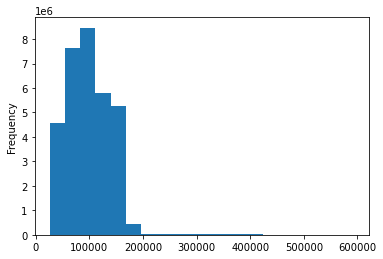

In [35]:
# Creating a histogram to plot income groups
db_merge['Income'].plot.hist(bins = 20)

In [36]:
# Creating condtion for income ranges

income_groups = []

for value in db_merge['Income']:
    if value <= 50000: 
        income_groups.append('000000-050000')
    elif (value > 50000) and (value <= 100000):
        income_groups.append('050000-100000')
    elif (value > 100000) and (value <= 150000):
        income_groups.append('100000-150000')
    elif (value > 150000) and (value <= 200000):
        income_groups.append('150000-200000')
    elif (value > 200000) and (value <= 250000):
        income_groups.append('200000-250000')
    elif (value > 250000) and (value <= 300000):
        income_groups.append('250000-300000')
    elif (value > 300000) and (value <= 350000):
        income_groups.append('300000-350000')
    elif (value > 350000) and (value <= 400000):
        income_groups.append('350000-400000')
    elif (value > 400000):
        income_groups.append('400000+')
    else: 
        income_groups.append('ERROR')

In [37]:
# Applying condition to database
db_merge['income_groups'] = income_groups

In [38]:
# Checking condition age_groups
db_merge['income_groups'].value_counts().sort_index()

000000-050000     3598083
050000-100000    14010461
100000-150000    10773067
150000-200000     3795982
200000-250000       75943
250000-300000       81031
300000-350000       27278
350000-400000       26701
400000+             47695
Name: income_groups, dtype: int64

#### Question 5.3: Family Status

In [39]:
# Checking the frequency of Marital Status column
db_merge['Marital Status'].value_counts()

married                             22778287
single                               5331128
divorced/widowed                     2774573
living with parents and siblings     1552253
Name: Marital Status, dtype: int64

#### Question 5.4: Parental Status

In [40]:
# Checking the frequency of n_dependants column
db_merge['n_dependants'].value_counts().sort_index()

0    8105701
1    8088770
2    8098987
3    8142783
Name: n_dependants, dtype: int64

In [41]:
# Creating a condition for non-parents
db_merge.loc[db_merge['n_dependants'] == 0, 'parental_status'] = 'not a parent'

In [42]:
# Creating a condition for parents
db_merge.loc[db_merge['n_dependants'] >= 1, 'parental_status'] = 'parent'

In [43]:
db_merge['parental_status'].value_counts(dropna = False)

parent          24330540
not a parent     8105701
Name: parental_status, dtype: int64

#### Question 5.5: Certain Goods (department_id)

In [44]:
# Importing departments.csv
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [45]:
# Transposing data to identify what each number correlates too
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [46]:
# Creating condtion for deparment types with department_id

department_type = []

for value in db_merge['department_id']:
    if (value == 1): 
        department_type.append('frozen')
    elif (value == 2):
        department_type.append('other')
    elif (value == 3):
        department_type.append('bakery')
    elif (value == 4):
        department_type.append('produce')
    elif (value == 5):
        department_type.append('alcohol')
    elif (value == 6):
        department_type.append('international')
    elif (value == 7):
        department_type.append('beverages')
    elif (value == 8):
        department_type.append('pets')
    elif (value == 9):
        department_type.append('dry goods pasta')
    elif (value == 10):
        department_type.append('bulk')
    elif (value == 11):
        department_type.append('personal care')
    elif (value == 12):
        department_type.append('meat seafood')
    elif (value == 13):
        department_type.append('pantry')
    elif (value == 14):
        department_type.append('breakfast')
    elif (value == 15):
        department_type.append('canned goods')
    elif (value == 16):
        department_type.append('dairy eggs')
    elif (value == 17):
        department_type.append('household')
    elif (value == 18):
        department_type.append('babies')
    elif (value == 19):
        department_type.append('snacks')
    elif (value == 20):
        department_type.append('deli')
    elif (value == 21):
        department_type.append('missing')
    else: 
        department_type.append('MISSING DATA')

In [47]:
# Applying condition to database
db_merge['department_type'] = department_type

In [48]:
# Checking condition department_type
db_merge['department_type'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
MISSING DATA          2029
Name: department_type, dtype: int64

In [49]:
# Making the output of columns larger to view MISSING DATA
pd.options.display.max_columns = 50

In [50]:
# Creating a dataframe to check why there is MISSING DATA
df_nan = db_merge[db_merge['department_id'].isnull() == True]

In [51]:
# Running new dataframe
df_nan

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,Last Name,Gender,State,Age,Date Joined,n_dependants,Marital Status,Income,_merge,region,exclusion_flag,age_groups,income_groups,parental_status,department_type
2963,7099,27,63,3,10,1.0,6799,1,0,NaN,NaN,NaN,NaN,81,Loyal customer,7.659269,Low Spender,5.0,Frequent customer,Waters,Female,New York,81,4/25/2018,0,divorced/widowed,110170,both,Northeast,High-activity customer,80+,100000-150000,not a parent,MISSING DATA
3205,1837192,27,80,2,8,6.0,6799,9,1,NaN,NaN,NaN,NaN,81,Loyal customer,7.659269,Low Spender,5.0,Frequent customer,Waters,Female,New York,81,4/25/2018,0,divorced/widowed,110170,both,Northeast,High-activity customer,80+,100000-150000,not a parent,MISSING DATA
45606,2915432,298,1,4,14,NaN,6799,2,0,NaN,NaN,NaN,NaN,3,New customer,7.465957,Low Spender,14.0,Regular customer,Hall,Female,Tennessee,57,2/8/2017,3,married,95735,both,South,Low-activity customer,51-60,050000-100000,parent,MISSING DATA
45637,613874,298,3,1,12,14.0,6799,2,1,NaN,NaN,NaN,NaN,3,New customer,7.465957,Low Spender,14.0,Regular customer,Hall,Female,Tennessee,57,2/8/2017,3,married,95735,both,South,Low-activity customer,51-60,050000-100000,parent,MISSING DATA
73861,690386,479,1,3,17,NaN,6799,7,0,NaN,NaN,NaN,NaN,23,Regular customer,7.078298,Low Spender,14.0,Regular customer,Haynes,Female,Maine,45,5/26/2017,1,married,157402,both,Northeast,High-activity customer,41-50,150000-200000,parent,MISSING DATA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32262577,2343020,205066,10,1,12,7.0,6799,5,1,NaN,NaN,NaN,NaN,22,Regular customer,7.664607,Low Spender,7.0,Frequent customer,Castro,Male,Vermont,57,8/10/2018,2,married,164067,both,Northeast,High-activity customer,51-60,150000-200000,parent,MISSING DATA
32263334,1362194,205068,14,6,12,8.0,6799,14,0,NaN,NaN,NaN,NaN,60,Loyal customer,8.253509,Low Spender,6.0,Frequent customer,Shepard,Female,Washington,80,10/5/2018,3,married,94695,both,West,High-activity customer,71-80,050000-100000,parent,MISSING DATA
32284084,441699,205213,18,5,13,5.0,6799,3,0,NaN,NaN,NaN,NaN,48,Loyal customer,8.249121,Low Spender,8.0,Frequent customer,Brandt,Male,Rhode Island,59,9/21/2018,0,single,119088,both,Northeast,High-activity customer,51-60,100000-150000,not a parent,MISSING DATA
32284293,793842,205213,27,3,12,9.0,6799,24,1,NaN,NaN,NaN,NaN,48,Loyal customer,8.249121,Low Spender,8.0,Frequent customer,Brandt,Male,Rhode Island,59,9/21/2018,0,single,119088,both,Northeast,High-activity customer,51-60,100000-150000,not a parent,MISSING DATA


##### NOTE: It appears there is a lot of missing data regarding the product. Including product_name, aisle_id, and prices. I'm not going to delete the columns as it helps with more information than hurts.

#### Question 5.6: orders_day_of_the_week

In [52]:
# Creating condtion for days of the week

day_ordered = []

for value in db_merge['order_day_of_week']:
    if (value == 0): 
        day_ordered.append('Saturday')
    elif (value == 1):
        day_ordered.append('Sunday')
    elif (value == 2):
        day_ordered.append('Monday')
    elif (value == 3):
        day_ordered.append('Tuesday')
    elif (value == 4):
        day_ordered.append('Wednesday')
    elif (value == 5):
        day_ordered.append('Thursday')
    elif (value == 6):
        day_ordered.append('Friday')
    else: 
        day_ordered.append('MISSING DAY')

In [53]:
# Applying condition to database
db_merge['day_ordered'] = day_ordered

In [54]:
# Checking condition department_type
db_merge['day_ordered'].value_counts()

Saturday     6210030
Sunday       5666177
Friday       4500536
Monday       4218024
Thursday     4209718
Tuesday      3844342
Wednesday    3787414
Name: day_ordered, dtype: int64

#### Question 5.7: Making comparisions between the data

In [55]:
# Creating a Crosstab between Age and parental status
crosstab_age_perental_status = pd.crosstab(db_merge['age_groups'], db_merge['parental_status'], dropna = False)

In [56]:
crosstab_age_perental_status

parental_status,not a parent,parent
age_groups,,
18-20,362174,1162288
21-30,1283854,3797637
31-40,1263357,3811973
41-50,1254400,3842570
51-60,1284632,3780510
61-70,1269100,3740501
71-80,1243373,3830042
80+,144811,365019


##### NOTE: Should be documented that if we wanted to advertise towards young adults without kids, we'd be advertising to 1646028 people. Young adult is classified as age ranges between 18-30. Despite this, there are a lot more young parents who use Instacart's services and therefore should be targeted over young adults.

In [57]:
# Creating a Crosstab between Age and Income
crosstab_age_income = pd.crosstab(db_merge['age_groups'], db_merge['income_groups'], dropna = False)

In [58]:
crosstab_age_income

income_groups,000000-050000,050000-100000,100000-150000,150000-200000,200000-250000,250000-300000,300000-350000,350000-400000,400000+
age_groups,,,,,,,,,
18-20,235438,1240047,35403,9493,1753,79,1819,430,0
21-30,809027,4117256,109278,28632,3095,3685,5824,4694,0
31-40,788553,4118177,119347,28533,3681,6793,3187,7059,0
41-50,415186,1118394,2573275,926777,19747,21034,5422,1048,16087
51-60,455723,1108706,2542931,911403,14806,11955,5113,6523,7982
61-70,426601,1088693,2534602,907873,17709,16571,2151,5318,10083
71-80,419923,1104266,2598345,900865,14790,18611,3762,1629,11224
80+,47632,114922,259886,82406,362,2303,0,0,2319


##### NOTE: This chart isn't as useful as some of the others when it comes to demographics as the majority of 18-40-year-olds don't makeover 400,000 dollars. So a lot of commercials shouldn't be targeted towards people who make over 150,000 as most of Instacart's demographics are below that median.

In [59]:
# Creating a Crosstab between Age and department type
crosstab_age_department_type = pd.crosstab(db_merge['age_groups'], db_merge['department_type'], dropna = False)

In [60]:
crosstab_age_department_type

department_type,MISSING DATA,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_groups,,,,,,,,,,,,,,,,,,,,,,
18-20,98,8852,20557,54233,122809,33887,1648,50237,254881,49052,40840,106218,35426,12995,33665,3649,1946,88243,21476,5159,444498,134093
21-30,355,23547,66414,185082,420077,111998,5518,169690,849619,164346,137567,348632,114351,42422,110329,10960,5793,292749,69804,15451,1480396,456391
31-40,314,24851,65792,183691,414383,110662,5342,166296,853586,164900,134023,346793,114733,42560,109731,10594,5479,291574,69109,14641,1492122,454154
41-50,407,24138,69771,185608,422968,112339,5604,166517,855715,164870,134949,349481,115954,42408,111415,11045,5656,296098,71066,15317,1488008,447636
51-60,282,23789,64244,184254,424912,111203,5170,167489,835038,163690,137123,350560,115319,41929,110243,10721,5715,294554,70977,15022,1477648,455260
61-70,285,22927,65326,180793,415269,107860,5401,165235,832303,163706,133836,348725,114513,41102,110880,10412,5667,290069,68883,15270,1468158,442981
71-80,185,23458,64863,184708,425782,110935,5365,165958,848643,164478,135132,349847,116988,41726,111377,10634,5456,293066,69411,15462,1478993,450948
80+,103,2181,6835,18418,41959,11763,525,16636,84231,16207,13157,36176,11382,4111,11291,1130,579,29224,6965,1402,149468,46087


##### NOTE: We can profile customers and what they shop for by using these diagnostics. For example, take baby products bought by 21-30-year-olds, this information gives us key insight into who is a young parent vs who isn't. Another example would be looking at who buys the most of each product and then we can start advertising towards that demographic.

In [61]:
# Creating a Crosstab between Age and Marital Status type
crosstab_age_marital_status = pd.crosstab(db_merge['age_groups'], db_merge['Marital Status'], dropna = False)

In [62]:
crosstab_age_marital_status

Marital Status,divorced/widowed,living with parents and siblings,married,single
age_groups,,,,
18-20,0,1162288,0,362174
21-30,0,389965,3407672,1283854
31-40,0,0,3811973,1263357
41-50,0,0,3842570,1254400
51-60,117289,0,3780510,1167343
61-70,1269100,0,3740501,0
71-80,1243373,0,3830042,0
80+,144811,0,365019,0


##### NOTE: There are some interesting findings here. We now know that there are no divorced/widowed couples who use Instacart's services between the age ranges of 18-50. While at the same time no one lives with parents and siblings between the age ranges 31-80+. There are also no single people who use Instacart's service between 61-80+. This helps to identify who we need to market for by breaking down marital status. For example, Instacart shouldn't create an advertisement towards single 80-year-olds as it wouldn't be effective.

In [63]:
# Creating a Crosstab between Age and day ordered
crosstab_age_day_ordered = pd.crosstab(db_merge['age_groups'], db_merge['day_ordered'], dropna = False)

In [64]:
crosstab_age_day_ordered

day_ordered,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
age_groups,,,,,,,
18-20,212085,195281,289257,268040,199823,181148,178828
21-30,704546,660158,979531,891728,658948,594841,591739
31-40,688953,654530,978075,897224,656250,602924,597374
41-50,712836,667905,971503,883547,659638,604185,597356
51-60,704221,663947,967212,886202,658192,597588,587780
61-70,699073,652839,948179,872810,650550,599368,586782
71-80,706861,656384,979547,879282,658002,604722,588617
80+,71961,66980,96726,87344,68315,59566,58938


##### NOTE: Saturday is the most optimal day to utilize Instacart's services for all ages. If the marketing team wanted to advertise properly, I'd recommend they push more advertisements on Friday and Saturday to remind people they need to order groceries. Otherwise, there isn't much of a correlation between age ranges and what day they order.

#### Question 5.8: Final Thoughts
##### To figure out more demographical information you can run multiple crosstabs to understand the demographics to advertise too. All the required information is put together and just needs to be run. Ultimately, I broke down some key demographic elements within the Instacart system.

### Question 6. Create an appropriate visualization to show the distribution of profiles.

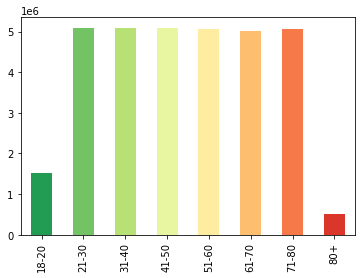

In [65]:
# Bar chart representing ages
bar_age = db_merge['age_groups'].value_counts().sort_index().plot.bar(color = sns.color_palette('RdYlGn_r', 8))

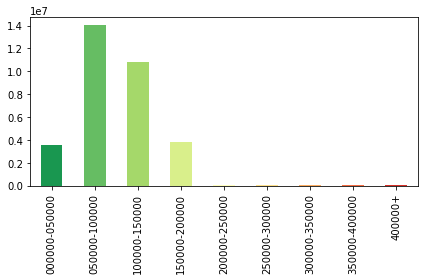

In [66]:
# Bar chart representing income
bar_income = db_merge['income_groups'].value_counts().sort_index().plot.bar(color = sns.color_palette('RdYlGn_r', 9))
plt.tight_layout()

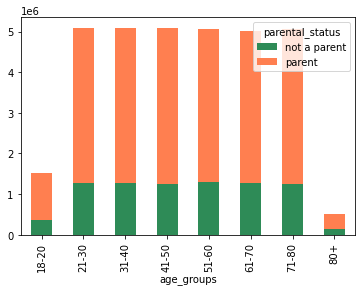

In [67]:
# Bar Chart representing parental status by age
bar_age_parental_status = crosstab_age_perental_status.plot(kind = 'bar', stacked = True, color = ('seagreen', 'coral'))

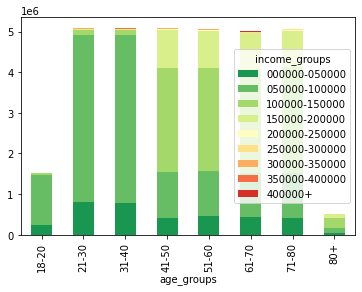

In [68]:
# Bar Chart representing income groups by age
bar_age_income = crosstab_age_income.plot (kind='bar', stacked = True, color = (sns.color_palette('RdYlGn_r', 9)))

Text(0, 0.5, '')

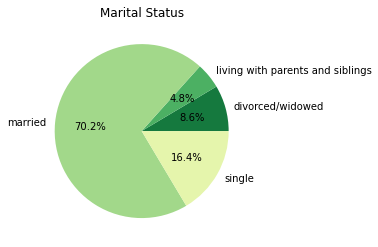

In [159]:
# Pie Chart representing marital status
pie_marital_status = db_merge['Marital Status'].value_counts().sort_index().plot(kind = 'pie', autopct='%1.1f%%',
                                                    colors = sns.color_palette('YlGn_r',4),   
                                                    title = 'Marital Status')
plt.ylabel('')

Text(0, 0.5, '')

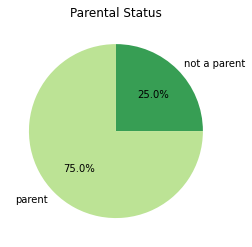

In [170]:
# Pie Chart representing parential status
pie_parental_status = db_merge['parental_status'].value_counts().sort_index().plot(kind = 'pie', autopct='%1.1f%%',
                                                    colors = sns.color_palette('YlGn_r',2),   
                                                    title = 'Parental Status')
plt.ylabel('')

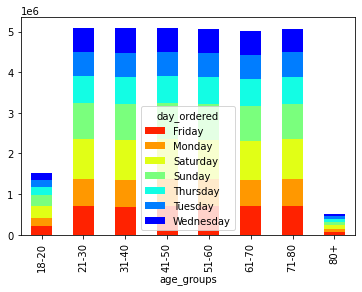

In [71]:
# Bar Chart representing order dates by age
bar_age_order_date = crosstab_age_day_ordered.sort_index().plot (kind='bar', stacked = True, color = (sns.color_palette('jet_r', 7)))

Text(0.5, 0, 'hour of the day')

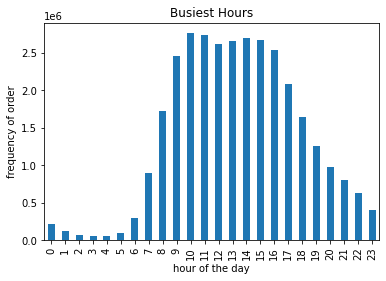

In [156]:
# Bar chart to show busiest hours
bar_busiest_hour = db_merge['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Busiest Hours')
plt.ylabel('frequency of order')
plt.xlabel('hour of the day')

Text(0.5, 0, 'day of the week')

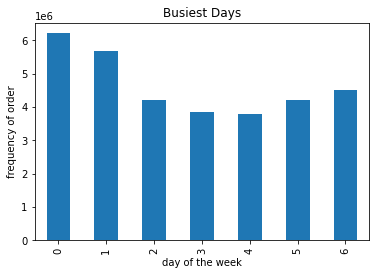

In [73]:
# Bar chart to show busiest days
bar_busiest_days = db_merge['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Busiest Days')
plt.ylabel('frequency of order')
plt.xlabel('day of the week')

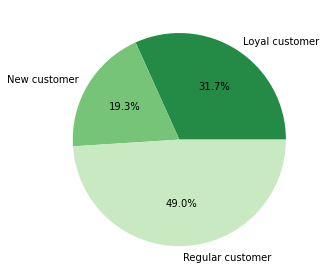

In [152]:
# Pie chart of loyality customers
loyalty_pie = db_merge['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('Greens_r',3))
plt.ylabel('')
plt.tight_layout()

In [75]:
# Creating a Crosstab between loyality customer and Income_groups ordered
crosstab_loyalty_income = pd.crosstab(db_merge['income_groups'], db_merge['loyalty_flag'], dropna = False)

Text(0.5, -55.125, 'Income')

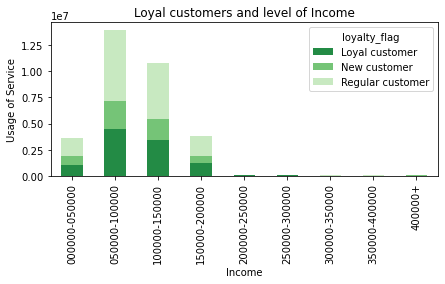

In [153]:
# Stacked bar chart displaying crosstab_loyality_income
bar_loyalty_income = crosstab_loyalty_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',3))
plt.tight_layout()
plt.title('Loyal customers and level of Income')
plt.ylabel('Usage of Service')
plt.xlabel('Income')


Text(0.5, 0, 'Regions')

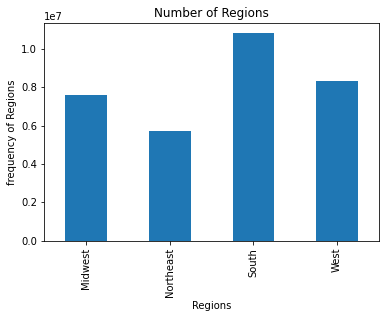

In [77]:
# Bar chart to show regions
bar_region = db_merge['region'].value_counts().sort_index().plot.bar()
plt.title('Number of Regions')
plt.ylabel('frequency of Regions')
plt.xlabel('Regions')

Text(0.5, 0, 'Department')

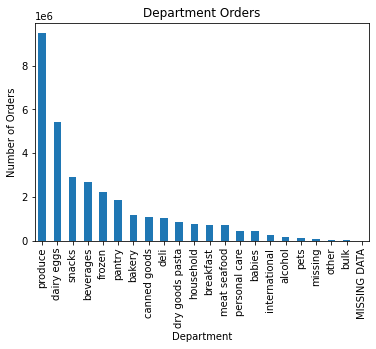

In [161]:
# Bar chart to show department products
bar_products_department = db_merge['department_type'].value_counts().plot.bar()
plt.title('Department Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Department')

In [178]:
# Checking head of price_range
df_price_range.head(2)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,busist_day,price_range,busiest_day,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77.0,7.0,9.0,both,Regularly busy,mid_range product,Regularly busy,Average orders
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Regularly busy,mid_range product,Regularly busy,Average orders


In [176]:
# Dropping Not enough data from price_range data
df_price_range.drop(df_price_range[df_price_range['price_range'] == 'Not enough data'].index, inplace = True)

Text(0, 0.5, '')

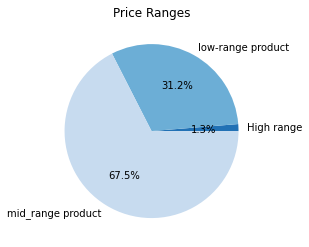

In [177]:
# Pie Chart representing price ranges
pie_price_ranges = df_price_range['price_range'].value_counts().sort_index().plot(kind = 'pie', autopct='%1.1f%%',
                                                    colors = sns.color_palette('Blues_r',3),   
                                                    title = 'Price Ranges')
plt.ylabel('')

In [180]:
# Creating condtion for deparment types with department_id for df_price_range

department_type = []

for value in df_price_range['department_id']:
    if (value == 1): 
        department_type.append('frozen')
    elif (value == 2):
        department_type.append('other')
    elif (value == 3):
        department_type.append('bakery')
    elif (value == 4):
        department_type.append('produce')
    elif (value == 5):
        department_type.append('alcohol')
    elif (value == 6):
        department_type.append('international')
    elif (value == 7):
        department_type.append('beverages')
    elif (value == 8):
        department_type.append('pets')
    elif (value == 9):
        department_type.append('dry goods pasta')
    elif (value == 10):
        department_type.append('bulk')
    elif (value == 11):
        department_type.append('personal care')
    elif (value == 12):
        department_type.append('meat seafood')
    elif (value == 13):
        department_type.append('pantry')
    elif (value == 14):
        department_type.append('breakfast')
    elif (value == 15):
        department_type.append('canned goods')
    elif (value == 16):
        department_type.append('dairy eggs')
    elif (value == 17):
        department_type.append('household')
    elif (value == 18):
        department_type.append('babies')
    elif (value == 19):
        department_type.append('snacks')
    elif (value == 20):
        department_type.append('deli')
    elif (value == 21):
        department_type.append('missing')
    else: 
        department_type.append('MISSING DATA')

In [181]:
# Applying condition to database
df_price_range['department_type'] = department_type

In [184]:
# creating crosstabs between price_range and department
crosstab_price_range_deptartment = pd.crosstab(df_price_range['department_type'], df_price_range['price_range'], dropna = False)


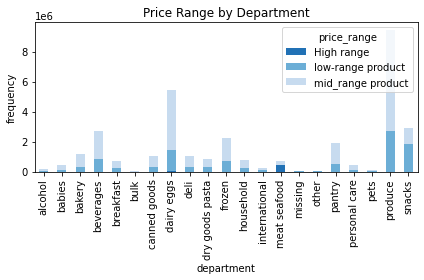

In [186]:
# Stacked bar chart displaying crosstab_loyality_department
bar_price_ranges = crosstab_price_range_deptartment.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r',3))
plt.title('Price Range by Department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

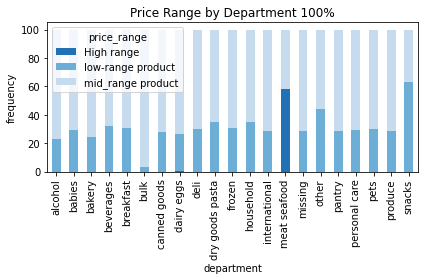

In [187]:
bar_price_ranges_100 = crosstab_price_range_deptartment.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues_r',3))
plt.title('Price Range by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

### Question 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [79]:
# Expenditure by income 
db_merge.groupby('income_groups').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_groups                     
000000-050000  6.702746  1.0  25.0
050000-100000  7.898732  1.0  25.0
100000-150000  7.968182  1.0  25.0
150000-200000  7.963105  1.0  25.0
200000-250000  7.781932  1.0  25.0
250000-300000  7.808058  1.0  25.0
300000-350000  7.771003  1.0  25.0
350000-400000  7.767629  1.0  25.0
400000+        7.740390  1.0  25.0

In [80]:
# Expenditure by Age
db_merge.groupby('age_groups').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
age_groups                     
18-20       7.800415  1.0  25.0
21-30       7.783241  1.0  25.0
31-40       7.796449  1.0  25.0
41-50       7.804943  1.0  25.0
51-60       7.786307  1.0  25.0
61-70       7.804320  1.0  25.0
71-80       7.796461  1.0  25.0
80+         7.807234  1.0  25.0

In [81]:
# Expenditure by Parental status
db_merge.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
parental_status                     
not a parent     7.794896  1.0  25.0
parent           7.795974  1.0  25.0

In [82]:
# Expenditure by region
db_merge.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.797045  1.0  25.0
Northeast  7.787506  1.0  25.0
South      7.799574  1.0  25.0
West       7.795099  1.0  25.0

In [83]:
# Expenditure by marital status
db_merge.groupby('Marital Status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
Marital Status                                       
divorced/widowed                  7.805965  1.0  25.0
living with parents and siblings  7.805889  1.0  25.0
married                           7.795298  1.0  25.0
single                            7.789136  1.0  25.0

### Question 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Question 8.1: Loyality status
##### Ordering Habits

In [84]:
# Ordering habits based on a customer's loyalty status?
crosstab_loyalty_deptartment = pd.crosstab(db_merge['department_type'], db_merge['loyalty_flag'], dropna = False)

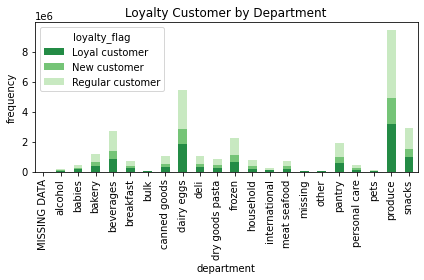

In [129]:
# Stacked bar chart displaying crosstab_loyality_department
bar_loyalty_deptartment = crosstab_loyalty_deptartment.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',3))
plt.title('Loyalty Customer by Department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [86]:
# Export bar chart
bar_loyalty_deptartment.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_by_department.png'))


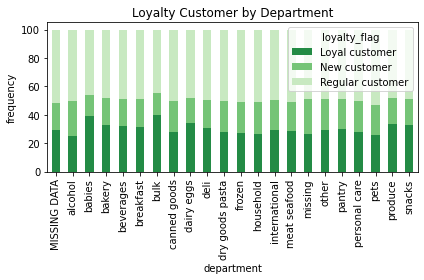

In [130]:
# Stacked bar chart displaying crosstab_loyality_department maxed by 100 % 
bar_loyalty_department_100 = crosstab_loyalty_deptartment.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',3))
plt.title('Loyalty Customer by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [88]:
# Export 100% bar chart
bar_loyalty_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_by_department_100.png'))


##### Region

In [89]:
# Region based on a customer's loyalty status?
crosstab_loyalty_region = pd.crosstab(db_merge['region'], db_merge['loyalty_flag'], dropna = False)

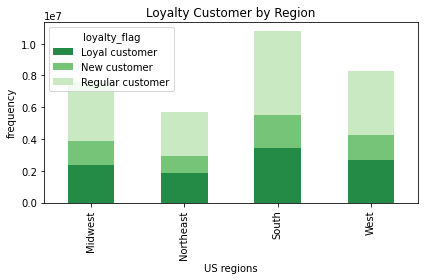

In [131]:
# Stacked bar chart displaying crosstab_loyalty_region
bar_loyalty_region = crosstab_loyalty_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',3))
plt.title('Loyalty Customer by Region')
plt.ylabel('frequency')
plt.xlabel('US regions')
plt.tight_layout()

In [91]:
# Export bar chart
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_by_region.png'))


#### Question 8.2: Region and Ordering Habits

In [92]:
# Ordering habits based on Regions?
crosstab_Region_deptartment = pd.crosstab(db_merge['department_type'], db_merge['region'], dropna = False)

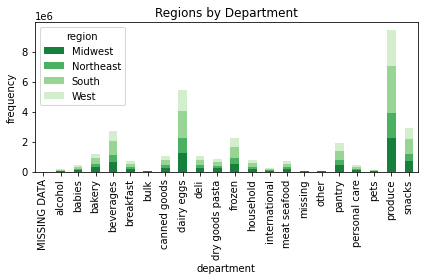

In [132]:
# Stacked bar chart displaying crosstab_Region_deptartment
bar_region_deptartment = crosstab_Region_deptartment.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',4))
plt.title('Regions by Department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [94]:
# Export bar chart
bar_region_deptartment.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_by_region.png'))


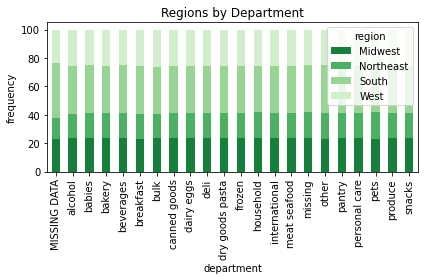

In [133]:
# Stacked bar chart displaying crosstab_Region_deptartment maxed by 100 % 
bar_region_department_100 = crosstab_Region_deptartment.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',4))
plt.title('Regions by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [96]:
# Export 100% bar chart
bar_region_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_by_region_100.png'))


#### Question 8.3: Parental Status
##### Ordering Habits

In [97]:
# Parental Status based on Department?
crosstab_parental_department = pd.crosstab(db_merge['department_type'], db_merge['parental_status'], dropna = False)

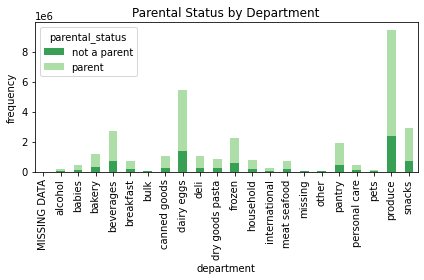

In [134]:
# Stacked bar chart 
bar_parental_status_department = crosstab_parental_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',2))
plt.title('Parental Status by Department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [99]:
# Export bar chart
bar_parental_status_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_by_department.png'))


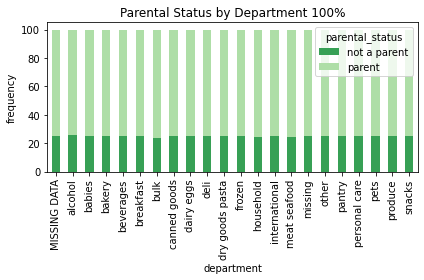

In [135]:
# Stacked bar chart displaying crosstab_parental_department maxed by 100 % 
bar_parental_status_department_100 = crosstab_parental_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',2))
plt.title('Parental Status by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [123]:
# Export 100% bar chart
bar_parental_status_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_by_department_100.png'))


##### Region

In [100]:
# Parental Status based on Regions?
crosstab_parental_region = pd.crosstab(db_merge['parental_status'], db_merge['region'], dropna = False)

Text(0.5, 0, 'parental status')

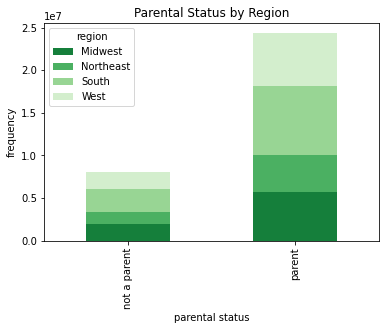

In [138]:
# Stacked bar chart 
bar_parental_status_region = crosstab_parental_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r', 4))
plt.title('Parental Status by Region')
plt.ylabel('frequency')
plt.xlabel('parental status')


In [102]:
# Export bar chart
bar_parental_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parental_status_by_region.png'))


#### Question 8.4: Age
##### Ordering Habits

In [103]:
# Age Groups based on Department?
crosstab_age_groups_department = pd.crosstab(db_merge['department_type'], db_merge['age_groups'], dropna = False)

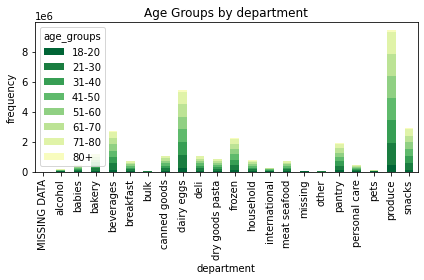

In [139]:
# Stacked bar chart 
bar_age_groups_department = crosstab_age_groups_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGn_r', 8))
plt.title('Age Groups by department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [105]:
# Export bar chart
bar_age_groups_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_groups_by_department.png'))


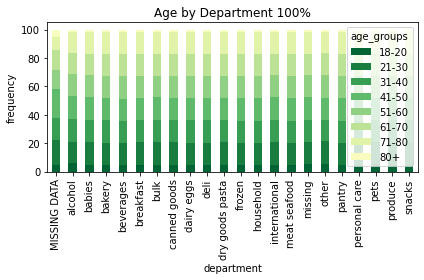

In [160]:
# Stacked bar chart displaying crosstab_age_groups_department maxed by 100 % 
bar_age_groups_department_100 = crosstab_age_groups_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGn_r', 8))
plt.title('Age by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

##### Region

In [106]:
# Age Groups based on Region?
crosstab_age_groups_region = pd.crosstab(db_merge['region'], db_merge['age_groups'], dropna = False)

Text(0.5, 0, 'region')

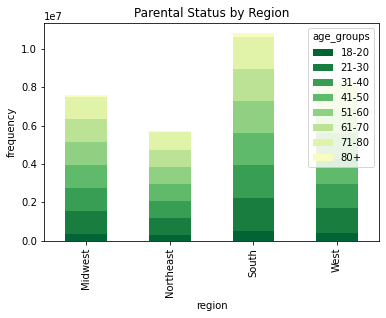

In [142]:
# Stacked bar chart 
bar_age_groups_region = crosstab_age_groups_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGn_r', 8))
plt.title('Parental Status by Region')
plt.ylabel('frequency')
plt.xlabel('region')

In [108]:
# Export bar chart
bar_age_groups_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_groups_by_region.png'))


#### Question 8.5: Marital Status
##### Ordering Habits

In [109]:
# Marital Status based on Department?
crosstab_marriage_by_department = pd.crosstab(db_merge['department_type'], db_merge['Marital Status'], dropna = False)

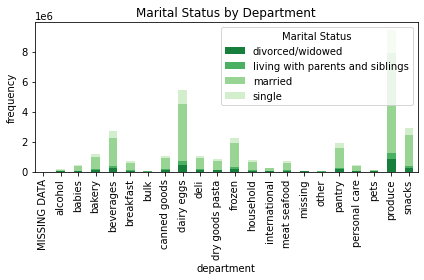

In [143]:
# Stacked bar chart 
bar_marriage_by_department = crosstab_marriage_by_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',4))
plt.title('Marital Status by Department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [111]:
# Export bar chart
bar_marriage_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status_by_department.png'))


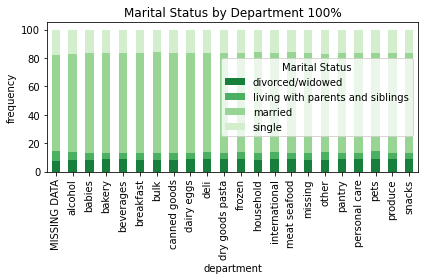

In [144]:
# Stacked bar chart displaying crosstab_marriage_department maxed by 100 % 
bar_marriage_by_department_100 = crosstab_marriage_by_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',4))
plt.title('Marital Status by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [125]:
# Export 100% bar chart
bar_marriage_by_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_Marital_Status_by_department_100.png'))


##### Region

In [112]:
# Marital Status based on Region?
crosstab_marriage_by_region = pd.crosstab(db_merge['region'], db_merge['Marital Status'], dropna = False)

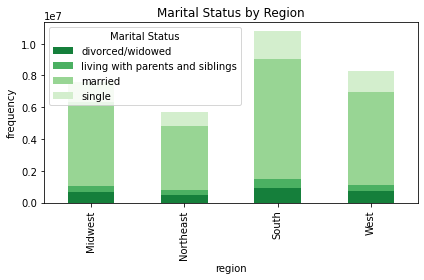

In [145]:
# Stacked bar chart 
bar_marriage_by_region = crosstab_marriage_by_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens_r',4))
plt.title('Marital Status by Region')
plt.ylabel('frequency')
plt.xlabel('region')
plt.tight_layout()

In [114]:
# Export bar chart
bar_marriage_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status_by_region.png'))


#### Question 8.6 Income
##### Ordering Habits

In [115]:
# Income based on Department?
crosstab_Income_by_department = pd.crosstab(db_merge['department_type'], db_merge['income_groups'], dropna = False)

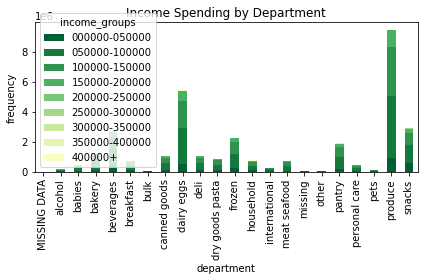

In [147]:
# Stacked bar chart 
bar_income_by_department = crosstab_Income_by_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGn_r',9))
plt.title('Income Spending by Department')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [117]:
# Export bar chart
bar_income_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_by_department.png'))


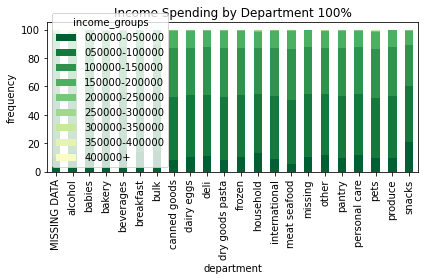

In [148]:
# Stacked bar chart displaying crosstab_income_department maxed by 100 % 
bar_income_by_department_100 = crosstab_Income_by_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGn_r',9))
plt.title('Income Spending by Department 100%')
plt.ylabel('frequency')
plt.xlabel('department')
plt.tight_layout()

In [127]:
# Export bar chart
bar_income_by_department_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_by_department_100.png'))


##### Region

In [118]:
# Income based on Region?
crosstab_income_by_region = pd.crosstab(db_merge['region'], db_merge['income_groups'], dropna = False)

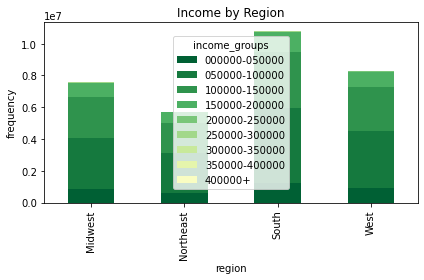

In [150]:
# Stacked bar chart 
bar_income_by_region = crosstab_income_by_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGn_r',9))
plt.title('Income by Region')
plt.ylabel('frequency')
plt.xlabel('region')
plt.tight_layout()

In [120]:
# Export bar chart
bar_income_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_by_region.png'))
